<a href="https://colab.research.google.com/github/symbiapps/Boston-Airbnb-Open-Data/blob/main/Boston_listing_airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
from itertools import chain

#### *Importing of the Boston listing airbnb dataset*

In [5]:
data = pd.read_csv("/content/drive/MyDrive/archive (5)/listings.csv")

###*Check the basic structure of the data*

In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


#### *Checking on the data type of the columns*

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

### *Here I drop the None values in the  'amenities' column.*

In [5]:
none_na_data = data.dropna(subset=['amenities'])


### *Here I loop through  the rows of the "amenities" column and append the results to a newly constructed values list.  I also stripped  the list of non-word characters curly braces ,double quotation mark etc.  I then  split the values and  finally flatten into one list.*

In [44]:
values = []
for  v in none_na_data['amenities'].items():
     values.append(str(v).strip('{}"\n[(').split())
amenities_list= str(sum(values,[]))

### *I turn an image of the Airbnb logo  into a numpy array. I then used the image to help construct a Word Cloud object that then generate the cloud using the amenities_list and  then save it to a file.* 

In [46]:
logo_mask = np.array(Image.open('/content/drive/MyDrive/pink_airbnb3.jpg'))
wc = WordCloud(background_color='white',width=900, height=400,mask=logo_mask)
wc.generate(amenities_list)
wc.to_file('amenities_list14.png')

#### *import the word cloud file and resized it*

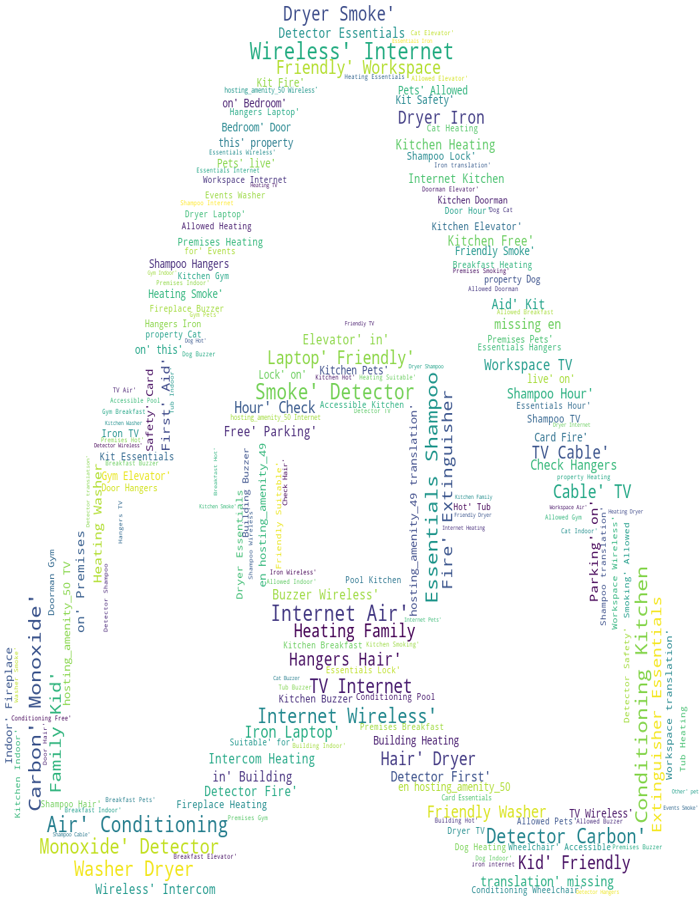

In [53]:
image = Image.open('/content/amenities_list14.png')
image.resize((700,900))

####*Here I filtered down the **data** dataframe to a smaller dataframe made up of the choosen  columns.*

In [74]:
data2= data[['neighbourhood','property_type', 'room_type', 'accommodates',
             'bathrooms', 'bedrooms', 'beds','review_scores_rating', 'price']]


### Here we replace nan values of the respective columns 

In [75]:
data2['neighbourhood'] = data2.loc[:,'neighbourhood'].replace(np.nan,'Not_Stated')
data2['review_scores_rating'] = data2.loc[:,'review_scores_rating'].replace(np.nan,0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### *Here I replaced the $ signs*

In [77]:
data2['price']= data2.loc[:,'price'].str.replace('$','')
data2.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price
0,Roslindale,House,Entire home/apt,4,1.5,2.0,3.0,0.0,250.00
1,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,94.0,65.00
2,Roslindale,Apartment,Private room,2,1.0,1.0,1.0,98.0,65.00
3,Not_Stated,House,Private room,4,1.0,1.0,2.0,100.0,75.00
4,Roslindale,House,Private room,2,1.5,1.0,2.0,99.0,79.00


### *There were a couple of columns with less than 5 NAN  values so I filled forward*

In [66]:
data2= data2.fillna(method='ffill',axis='columns')

### *Given the properpty type , room_type and accomodations capacity what is the median price a owner can expected to charge.*

In [67]:
data2["price"] = [float(str(i).replace(",", "")) for i in data2["price"]]

In [68]:
data2.groupby(['property_type','room_type','accommodates'])['price'].median().head(60)

property_type      room_type        accommodates
Allston-Brighton   Private room     1               115.0
Apartment          Entire home/apt  1               127.0
                                    2               164.0
                                    3               189.0
                                    4               200.0
                                    5               250.0
                                    6               250.0
                                    7               237.0
                                    8               332.0
                                    9               240.0
                                    10              297.0
                                    11              290.0
                                    12              525.0
                                    14              536.0
                   Private room     1                65.0
                                    2                85.0
                       

#### Given the properpty type , room_type and accomodations capacity. What is the median 'review_scores_rating' a owner can expected to receive.

In [27]:
data2.groupby(['property_type','room_type','accommodates'])['review_scores_rating'].median().head(60)

property_type      room_type        accommodates
Allston-Brighton   Private room     1                60.0
Apartment          Entire home/apt  1                80.0
                                    2                93.0
                                    3                86.0
                                    4                92.0
                                    5                80.0
                                    6                92.0
                                    7                88.5
                                    8                92.0
                                    9                91.0
                                    10               91.5
                                    11              100.0
                                    12               70.0
                                    14              100.0
                   Private room     1                88.0
                                    2                92.0
                       